# Country ,  🥩 , Population  


Importaciones necesarias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importación del dataset

In [2]:
data = pd.read_csv("./datafood.csv")

Eliminación los espacios al final de cada título en las columnas

In [3]:
data.columns = data.columns.str.rstrip()

Comprobación

In [4]:
data.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [5]:
data.shape

(21477, 63)

### LIMPIEZA DATASET 🧹🧽

Debido a la multitud de datos, en este trabajo voy a centrarme únicamente en la consumición de meat.

#### 1. Eliminación de todas las filas que no se refieran a carne para comida.

In [6]:
data.drop(data.loc[data['Item']!="Meat"].index, inplace=True)

In [7]:
data.drop(data.loc[data['Element']!="Food"].index, inplace=True)

#### 2. Eliminación de columnas que no son necesarias

In [8]:
data.drop(['latitude', 'longitude', 'Item Code', 'Element Code', 'Area Code', "Element Code", "Element"], axis=1, inplace=True, )

In [9]:
data.shape

(174, 57)

#### 3. Cambio del nombre de la columna Area. Será de utilidad después.

In [10]:
data.rename(columns={'Area': 'Country'}, inplace = True)

#### 4. Agrupación de las columnas en años.

Vamos a seleccionar un periodo de 5 años para que posteriormente nos coincida con el web scrabing.

Como todos los años son int o podremos operar con ellos.

In [11]:
data["C1965"] = (data.Y1961 +  data.Y1962 +  data.Y1963 +  data.Y1964 +  data.Y1965)/5
data["C1970"] = (data.Y1966 +  data.Y1967 +  data.Y1968 +  data.Y1969 +  data.Y1970)/5
data["C1975"] = (data.Y1971 +  data.Y1972 +  data.Y1973 +  data.Y1974 +  data.Y1975)/5
data["C1980"] = (data.Y1976 +  data.Y1977 +  data.Y1978 +  data.Y1979 +  data.Y1980)/5
data["C1985"] = (data.Y1981 +  data.Y1972 +  data.Y1973 +  data.Y1974 +  data.Y1975)/5
data["C1990"] = (data.Y1986 +  data.Y1987 +  data.Y1988 +  data.Y1989 +  data.Y1990)/5
data["C1995"] = (data.Y1991 +  data.Y1992 +  data.Y1993 +  data.Y1994 +  data.Y1995)/5
data["C2000"] = (data.Y1996 +  data.Y1997 +  data.Y1998 +  data.Y1999 +  data.Y2000)/5
data["C2005"] = (data.Y2001 +  data.Y2002 +  data.Y2003 +  data.Y2004 +  data.Y2005)/5
data["C2010"] = (data.Y2006 +  data.Y2007 +  data.Y2008 +  data.Y2009 +  data.Y2010)/5


In [12]:
data.drop(data.columns[3:57], axis=1, inplace=True)

#### 5. Cambio de índice (útil después)

Aquello que esta detrás del comodin puede ser util luego

In [13]:
n = range(1, 175)
n_list = list(n)
data["index"] = n_list
data.set_index("index", inplace=True)

#### 5. Anális data limpia

In [14]:
data

,Area Abbreviation,Country,Item,C1965,C1970,C1975,C1980,C1985,C1990,C1995,C2000,C2005,C2010
index,,,,,,,,,,,,,
1,AFG,Afghanistan,Meat,138.8,190.4,187.2,231.8,198.2,217.4,262.4,340.6,311.2,319.0
2,ALB,Albania,Meat,25.0,30.4,32.6,39.2,34.8,51.0,77.4,87.2,121.4,165.2
3,DZA,Algeria,Meat,104.2,106.8,137.2,179.6,157.6,409.0,506.6,555.4,627.4,682.0
4,AGO,Angola,Meat,37.6,53.4,69.8,95.0,79.0,143.8,140.2,188.2,306.8,470.4
5,ATG,Antigua and Barbuda,Meat,1.0,2.0,2.0,1.8,2.2,5.0,5.0,5.6,5.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,VEN,Venezuela (Bolivarian Republic of),Meat,238.4,310.8,432.6,628.6,511.8,774.2,847.8,1077.2,1368.8,1948.4
171,VNM,Viet Nam,Meat,399.2,442.4,445.6,452.2,482.2,995.0,1222.0,1667.0,2494.4,3995.8
172,YEM,Yemen,Meat,49.8,45.2,46.4,91.2,65.2,150.0,151.4,190.6,307.6,382.6


In [15]:
data.dtypes

Area Abbreviation     object
Country               object
Item                  object
C1965                float64
C1970                float64
C1975                float64
C1980                float64
C1985                float64
C1990                float64
C1995                float64
C2000                float64
C2005                float64
C2010                float64
dtype: object

In [16]:
data.isnull().sum(axis = 0)

Area Abbreviation     0
Country               0
Item                  0
C1965                28
C1970                28
C1975                28
C1980                28
C1985                28
C1990                28
C1995                27
C2000                 5
C2005                 3
C2010                 1
dtype: int64

### INSERTACIÓN WEB SCRAPING 👩‍💻

https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population

In [17]:
import requests
from bs4 import BeautifulSoup

In [18]:
url_POB = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_projected_future_population"
html_POB = requests.get(url_POB)

In [19]:
soup = BeautifulSoup(html_POB.content, "html.parser")

In [20]:
tablas = soup.find_all("table")
len(tablas)

4

En nuestro caso al haber solo 4 tablas, es bastante fácil saber cuales son las que nos interesan.
Como queremos obtener la información de la tabla 0 y de la tabla 1, tendremos que hacer dos pasos que serán iguales pero una paara cada tabla.


#### Tabla[0]

Nos permite obtener informacion de la población mundial entre los años 1960 y 1980.

In [21]:
p68 = tablas[0]

In [22]:
p68body = p68.find("tbody")

In [23]:
#p68body

In [24]:
trs = p68body.find_all("tr")

In [25]:
tr = trs[1]

In [26]:
colsp68 = tr.find_all("td")

In [27]:
colsp68[4].text.strip()

'9,830'

In [28]:
def get_row_info_p68(row):
    info = dict()
    
    colsp68 = row.find_all("td")
    
    info["Country1"] = colsp68[0].text.strip() 
    info["POB1965"] = colsp68[4].text.strip()
    info["POB1970"] = colsp68[6].text.strip()
    info["POB1975"] = colsp68[8].text.strip()
    info["POB1980"] = colsp68[10].text.strip()
    info["POB1985"] = colsp68[12].text.strip()
    
    return info

In [29]:
for i, row in enumerate(trs):
    try:
        get_row_info_p68(row)
    except:
        print(i)

0


In [30]:
data_POB68 = pd.DataFrame([get_row_info_p68(row) for row in trs[1:]])

Cambio de índice, (útil después)

In [31]:
n2 = range(1, 229)
n2_list = list(n2)
data_POB68["index2"] = n2_list
data_POB68.set_index("index2", inplace=True)

In [32]:
data_POB68

,Country1,POB1965,POB1970,POB1975,POB1980,POB1985
index2,,,,,,
1,Afghanistan,"9,830","10,998","12,431","14,133","15,045"
2,Albania,"1,624","1,884","2,157","2,402","2,672"
3,Algeria,"10,910","11,964","13,932","16,141","18,807"
4,American Samoa,21,25,28,30,33
5,Andorra,9,14,20,27,34
...,...,...,...,...,...,...
224,Western Sahara,28,50,90,73,125
225,Yemen,"5,872","6,511","7,099","7,935","9,133"
226,Zambia,"3,255","3,695","4,241","4,849","5,541"


#### Tabla[1]

Nos permite obtener informacion de la población mundial entre los años 1980 y 2015. 


👁️ El dataset de kagle solo nos da información hasta 2013.

In [33]:
p85 = tablas[1]

In [34]:
p85body = p85.find("tbody")

In [35]:
#p85body

In [36]:
trs = p85body.find_all("tr")

In [37]:
tr = trs[1]

In [38]:
colsp85 = tr.find_all("td")

In [39]:
colsp85[1].text.strip()

'13,120'

In [40]:
def get_row_info_p85(row):
    info = dict()
    
    colsp85 = row.find_all("td")
    
    info["Country2"] = colsp85[0].text.strip() 
    info["POB1990"] = colsp85[1].text.strip()
    info["POB1995"] = colsp85[3].text.strip()
    info["POB2000"] = colsp85[5].text.strip()
    info["POB2005"] = colsp85[7].text.strip()
    info["POB2005"] = colsp85[9].text.strip()
    info["POB2010"] = colsp85[11].text.strip()
    
    return info

In [41]:
for i, row in enumerate(trs):
    try:
        get_row_info_p85(row)
    except:
        print(i)

0


In [42]:
data_POB85 = pd.DataFrame([get_row_info_p85(row) for row in trs[1:]])

Cambio de índice, (útil después)

In [43]:
n2 = range(1, 229)
n2_list = list(n2)
data_POB85["index2"] = n2_list
data_POB85.set_index("index2", inplace=True)

In [44]:
data_POB85

,Country2,POB1990,POB1995,POB2000,POB2005,POB2010
index2,,,,,,
1,Afghanistan,"13,120","13,569","19,446","26,335","29,121"
2,Albania,"2,957","3,245","3,159","3,025","2,987"
3,Algeria,"22,009","25,191","28,322","32,918","35,950"
4,American Samoa,39,48,54,57,56
5,Andorra,45,53,64,77,85
...,...,...,...,...,...,...
224,Western Sahara,180,218,264,416,492
225,Yemen,"10,540","12,417","14,832","20,003","23,210"
226,Zambia,"6,536","7,604","8,691","11,373","13,042"


### Unión data sets obtenidos 🔗

Queremos unir tres Datasets.


#### Paso 1 : Unión data_POB85 y data_POB68

Aún así, antes de hacer este paso debemos entender la singularidad del paso 2.

#### Paso 2: Unión de data y de data_POB

Para ello es importante considerar que todos ellos tienen la columna de country, pero que el data_original tiene menos paises que la data_POB68 y la data_POB85 

Gracias a ello averiguamos que paises no coincden. (Lo he demostrado antes, pero al unir data_POB68 y data_POB85, no me deja)

Que Vietnam tenga un valor nulo, nos indica que a pesar de que ambas tablas se refieran a todos los países del mundo en orden alfabetico, ya que una dataframe lo denomina Vietnam y otro lo denomina Viet Nam. Para solucionarlos envez de referirnos al nombre del país nos referiremos a su 	"Alpha-3 code".

Esto no presenta un problema en el caso de de data pero si en data_POB. A continuación realizaremos los pasos para solucioanrlo.

#### Cambio indice data_POB68 y data_POB85

In [45]:
import country_converter as coco

Gracias a esta librería la transformación será más.


Lo primero realizamos una lista con todos los nombres de los países.

In [46]:
name_countries = data_POB68['Country1'].tolist()

In [47]:

iso3_codes = coco.convert(names=name_countries, to='ISO3')
print(iso3_codes)


World not found in regex


['AFG', 'ALB', 'DZA', 'ASM', 'AND', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COK', 'CRI', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FSM', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GGY', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'CIV', 'JAM', 'JPN', 'JEY', 'JOR', 'KAZ', 'KEN', 'KIR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'MDA', 'MCO', 'MNG', 'MNE', 'MSR', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL', 'NLD', 'NCL', 'NZL'

A cointinuación cambiamos esta lista por la lista que hace referencia a countries tanto en el data_POB68 como en data_POB85

#### data_POB68

In [48]:
data_POB68["Area Abbreviation1"] = iso3_codes

In [49]:
data_POB68

,Country1,POB1965,POB1970,POB1975,POB1980,POB1985,Area Abbreviation1
index2,,,,,,,
1,Afghanistan,"9,830","10,998","12,431","14,133","15,045",AFG
2,Albania,"1,624","1,884","2,157","2,402","2,672",ALB
3,Algeria,"10,910","11,964","13,932","16,141","18,807",DZA
4,American Samoa,21,25,28,30,33,ASM
5,Andorra,9,14,20,27,34,AND
...,...,...,...,...,...,...,...
224,Western Sahara,28,50,90,73,125,ESH
225,Yemen,"5,872","6,511","7,099","7,935","9,133",YEM
226,Zambia,"3,255","3,695","4,241","4,849","5,541",ZMB


#### data_POB85

In [50]:
data_POB85["Area Abbreviation2"] = iso3_codes

In [51]:
data_POB85

,Country2,POB1990,POB1995,POB2000,POB2005,POB2010,Area Abbreviation2
index2,,,,,,,
1,Afghanistan,"13,120","13,569","19,446","26,335","29,121",AFG
2,Albania,"2,957","3,245","3,159","3,025","2,987",ALB
3,Algeria,"22,009","25,191","28,322","32,918","35,950",DZA
4,American Samoa,39,48,54,57,56,ASM
5,Andorra,45,53,64,77,85,AND
...,...,...,...,...,...,...,...
224,Western Sahara,180,218,264,416,492,ESH
225,Yemen,"10,540","12,417","14,832","20,003","23,210",YEM
226,Zambia,"6,536","7,604","8,691","11,373","13,042",ZMB


A continuación eliminaremos las columnas que se refieren a los nombres de los paises en ambas tablas y convertiremos el Area Abbreviation como índice.
Esto último nos servirá para concatenar las tablas. 

In [52]:
data_POB68.drop(["Country1"], axis=1, inplace=True)
data_POB85.drop(["Country2"], axis=1, inplace=True)

In [53]:
#data_POB68.set_index("Area Abbreviation", inplace=True)
#data_POB85.set_index("Area Abbreviation", inplace=True)

In [54]:
data_POB = pd.concat([data_POB68, data_POB85], axis=1)

In [55]:
data_POB

,POB1965,POB1970,POB1975,POB1980,POB1985,Area Abbreviation1,POB1990,POB1995,POB2000,POB2005,POB2010,Area Abbreviation2
index2,,,,,,,,,,,,
1,"9,830","10,998","12,431","14,133","15,045",AFG,"13,120","13,569","19,446","26,335","29,121",AFG
2,"1,624","1,884","2,157","2,402","2,672",ALB,"2,957","3,245","3,159","3,025","2,987",ALB
3,"10,910","11,964","13,932","16,141","18,807",DZA,"22,009","25,191","28,322","32,918","35,950",DZA
4,21,25,28,30,33,ASM,39,48,54,57,56,ASM
5,9,14,20,27,34,AND,45,53,64,77,85,AND
...,...,...,...,...,...,...,...,...,...,...,...,...
224,28,50,90,73,125,ESH,180,218,264,416,492,ESH
225,"5,872","6,511","7,099","7,935","9,133",YEM,"10,540","12,417","14,832","20,003","23,210",YEM
226,"3,255","3,695","4,241","4,849","5,541",ZMB,"6,536","7,604","8,691","11,373","13,042",ZMB


#### Hacemos Paso 2 : Unión data_POB y data

Antes de la union debemos considerar que el Area Abbreviation de data_POB(usamos solo data_POB68, porque data_POB68 y data_POB85 tienen el Area Abbreviation repetido) y data no es el mismo. Por ello extraemos los Area Abbreviation cada columna, y aquellos correspondientes al data_POB que no existan en data serán eliminados, ya que la ausencia de información hara su estudio irrelevante.

In [56]:
datat = pd.concat([data["Area Abbreviation"], data_POB68["Area Abbreviation1"]], axis=1)

In [57]:
#datat = pd.concat([data, data_POB68], axis=1)

Eliminación: Crhistian me ha ayudado ya que el había tenido el mismo problema

#### data_POB68

In [58]:
for i, country in data.iterrows():
    print(i)
    
    data_POB68.loc[data_POB68["Area Abbreviation1"] == country["Area Abbreviation"], "comp"] = True

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174


In [59]:
data_POB68.drop(data_POB68.loc[data_POB68['comp']!=True].index, inplace=True)

In [60]:
data_POB68.drop(['comp'], axis=1, inplace=True)

In [61]:
data_POB68

,POB1965,POB1970,POB1975,POB1980,POB1985,Area Abbreviation1
index2,,,,,,
1,"9,830","10,998","12,431","14,133","15,045",AFG
2,"1,624","1,884","2,157","2,402","2,672",ALB
3,"10,910","11,964","13,932","16,141","18,807",DZA
6,"4,798","5,135","5,606","6,051","7,206",AGO
8,55,60,66,69,69,ATG
...,...,...,...,...,...,...
221,"7,557","9,068","10,759","12,675","14,768",VEN
222,"31,657","37,259","42,577","48,076","53,716",VNM
225,"5,872","6,511","7,099","7,935","9,133",YEM


#### data_POB85

In [62]:
for i, country in data.iterrows():
    print(i)
    
    data_POB85.loc[data_POB85["Area Abbreviation2"] == country["Area Abbreviation"], "comp"] = True

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174


In [63]:
data_POB85.drop(data_POB85.loc[data_POB85['comp']!=True].index, inplace=True)

In [64]:
data_POB85.drop(['comp'], axis=1, inplace=True)

In [65]:
data_POB85

,POB1990,POB1995,POB2000,POB2005,POB2010,Area Abbreviation2
index2,,,,,,
1,"13,120","13,569","19,446","26,335","29,121",AFG
2,"2,957","3,245","3,159","3,025","2,987",ALB
3,"22,009","25,191","28,322","32,918","35,950",DZA
6,"8,390","9,486","11,000","14,770","17,043",AGO
8,65,65,69,82,87,ATG
...,...,...,...,...,...,...
221,"16,998","19,326","21,550","25,270","27,224",VEN
222,"60,094","67,259","73,784","84,425","89,572",VNM
225,"10,540","12,417","14,832","20,003","23,210",YEM


#### Uniones con concat

Para hacer concat, es necesario que los índices coincidan. 
Gracias a los pasos anteriores, para ello solo es necesario que cambiemos los indices por los correspondientes Area Abbreviation de cada dataframe.

Set index:

In [66]:
data.set_index("Area Abbreviation", inplace=True)
data_POB68.set_index("Area Abbreviation1", inplace=True)
data_POB85.set_index("Area Abbreviation2", inplace=True)

Concatenamos 

In [67]:
data_POB = pd.concat([data_POB68, data_POB85], axis=1)



In [68]:
#data_total = pd.concat([data, data_POB], axis=1)


Como el data de kagle es hasta 2013 decidimos borrar todos aquellos datos posteriores a 2010.


In [69]:
#data.drop(['C2015'], axis=1, inplace=True)
#data_POB.drop(['POB2015'], axis=1, inplace=True)

In [70]:
data

,Country,Item,C1965,C1970,C1975,C1980,C1985,C1990,C1995,C2000,C2005,C2010
Area Abbreviation,,,,,,,,,,,,
AFG,Afghanistan,Meat,138.8,190.4,187.2,231.8,198.2,217.4,262.4,340.6,311.2,319.0
ALB,Albania,Meat,25.0,30.4,32.6,39.2,34.8,51.0,77.4,87.2,121.4,165.2
DZA,Algeria,Meat,104.2,106.8,137.2,179.6,157.6,409.0,506.6,555.4,627.4,682.0
AGO,Angola,Meat,37.6,53.4,69.8,95.0,79.0,143.8,140.2,188.2,306.8,470.4
ATG,Antigua and Barbuda,Meat,1.0,2.0,2.0,1.8,2.2,5.0,5.0,5.6,5.6,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,Venezuela (Bolivarian Republic of),Meat,238.4,310.8,432.6,628.6,511.8,774.2,847.8,1077.2,1368.8,1948.4
VNM,Viet Nam,Meat,399.2,442.4,445.6,452.2,482.2,995.0,1222.0,1667.0,2494.4,3995.8
YEM,Yemen,Meat,49.8,45.2,46.4,91.2,65.2,150.0,151.4,190.6,307.6,382.6


## CONCLUSIONES 📊


No he conseguido descubrir como juntar las dos tablas.
Además tampoco he conseguido hacer un gráfico de dos datasets diferentes.
Por ello utilizare un metodo sucio, para comprobar si la carne aumneta en función del aumento de población.
Investigar luego. 

Paso 1 = Cambio todas las comas por puntos para poder hacer la media. 

In [71]:
data_POB['POB1965'] = data_POB['POB1965'].str.replace(',', '').astype(float)
data_POB['POB1970'] = data_POB['POB1970'].str.replace(',', '').astype(float)
data_POB['POB1980'] = data_POB['POB1980'].str.replace(',', '').astype(float)
data_POB['POB1985'] = data_POB['POB1985'].str.replace(',', '').astype(float)
data_POB['POB1990'] = data_POB['POB1990'].str.replace(',', '').astype(float)
data_POB['POB1995'] = data_POB['POB1995'].str.replace(',', '').astype(float)
data_POB['POB2000'] = data_POB['POB2000'].str.replace(',', '').astype(float)
data_POB['POB2005'] = data_POB['POB2005'].str.replace(',', '').astype(float)
data_POB['POB2010'] = data_POB['POB2010'].str.replace(',', '').astype(float)

Paso 2 = Calculo la media.

In [72]:
data_POB.mean()

POB1965    17693.136095
POB1970    19469.579882
POB1980    23744.266272
POB1985    25822.076923
POB1990    28159.633136
POB1995    30670.372781
POB2000    33044.254438
POB2005    37490.715976
POB2010    39740.597633
dtype: float64

In [73]:
data.mean()

C1965     442.669863
C1970     536.395890
C1975     618.901370
C1980     722.147945
C1985     659.394521
C1990     966.039726
C1995    1138.463946
C2000    1239.882840
C2005    1382.607018
C2010    1564.495954
dtype: float64

Paso 3 = Creo un dataset con las medias. 


In [74]:
# Todo hecho a mano intentrar solucionar después.

In [75]:
d = {"POB": [17693.17, 19469.58,  21567.38, 25822.08, 28159.63, 30670.38, 33044.25, 35285.63, 37490.72, 39740.60], "CON": [17693.14, 19469.60, 21567.38, 25822.08, 28159.63, 30670.37, 33044.25, 35285.63, 37490.72, 39740.60], "YEAR": [1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010]}
data_total_media = pd.DataFrame(data=d)
data_total_media


,POB,CON,YEAR
0,17693.17,17693.14,1965
1,19469.58,19469.60,1970
2,21567.38,21567.38,1975
3,25822.08,25822.08,1980
4,28159.63,28159.63,1985
5,30670.38,30670.37,1990
6,33044.25,33044.25,1995
7,35285.63,35285.63,2000
8,37490.72,37490.72,2005
9,39740.60,39740.60,2010


Paso4 = Hacer un gráfico

<AxesSubplot:xlabel='POB', ylabel='CON'>

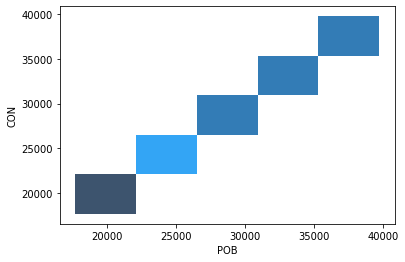

In [79]:
sns.histplot(x="POB", y="CON", data=data_total_media)

<AxesSubplot:xlabel='POB', ylabel='Count'>

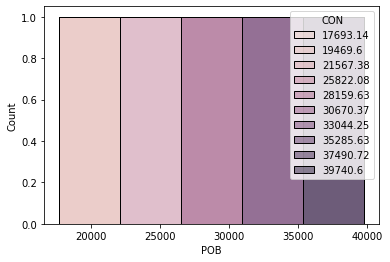

In [80]:
sns.histplot(x="POB", hue="CON", data=data_total_media)